### Importing libraries

In [1]:
import os
import PIL
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import h5py
import cv2
from pathlib import Path
%matplotlib inline

In [2]:
pwd()

'/Users/shyamsonu/Downloads/Brain Tumor Model'

#### Creating a folder to extract the dataset downloaded from figshare 

https://figshare.com/articles/dataset/brain_tumor_dataset/1512427


In [3]:
path = Path('/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset')
if not path.exists():
    path.mkdir()


#### Unzipping the dataset which is downloaded from figshare

In [4]:
import shutil

zip_file = '/Users/shyamsonu/Downloads/Brain Tumor Model/1512427.zip'
destination_dir = '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset'

shutil.unpack_archive(zip_file, destination_dir)


#### Retrieving the list of files in Brain Tumor dataset folder

In [5]:
destination_dir = '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset'

with os.scandir(destination_dir) as entries:
    print("Extracted files:")
    for entry in entries:
        if entry.is_file():
            print(entry.name)


Extracted files:
brainTumorDataPublic_2299-3064.zip
cvind.mat
brainTumorDataPublic_767-1532.zip
README.txt
brainTumorDataPublic_1-766.zip
brainTumorDataPublic_1533-2298.zip


#### Dataset description

In [6]:
with open('/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/README.txt') as f:
    contents = f.read()
    print(contents)

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
limit of repository, we split the whole dataset into 4 subsets, and achive 
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor
cjdata.PID: patient ID
cjdata.image: image data
cjdata.tumorBorder: a vector storing the coordinates of discrete points on tumor border.
		For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.
		It was generated by manually delineating the tumor border. So we can use it to generate
		binary image of tumor mask.
cjdata.tumorMask: a

#### Unzipping the 4 zip files in Brain Tumor dataset folder, 4 folders consist of .mat files

Creating 4 folder and unzipping and adding .mat files from 4 zip folders

brain_Tumor_Data1

brain_Tumor_Data2

brain_Tumor_Data3

brain_Tumor_Data4

In [7]:
import zipfile
import os

zip_files = [
    '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brainTumorDataPublic_1-766.zip',
    '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brainTumorDataPublic_767-1532.zip',
    '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brainTumorDataPublic_1533-2298.zip',
    '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brainTumorDataPublic_2299-3064.zip'
]

output_dirs = [
    '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brain_Tumor_Data1',
    '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brain_Tumor_Data2',
    '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brain_Tumor_Data3',
    '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brain_Tumor_Data4'
]

for zip_file, output_dir in zip(zip_files, output_dirs):
    with zipfile.ZipFile(zip_file) as zf:
        os.mkdir(output_dir)
        zip_dir = zf.namelist()[0]
        zf.extractall(output_dir)


#### Creating new folder and adding all .mat files to it

new folder name is all_mat_files_data

In [8]:
directory_path = '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/all_mat_files_data'
Path(directory_path).mkdir(parents=True, exist_ok=True)


In [9]:
# Define source directories
source_dirs = [
   '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brain_Tumor_Data1',
    '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brain_Tumor_Data2',
    '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brain_Tumor_Data3',
    '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/brain_Tumor_Data4'
]

# target directory
target_dir = '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/all_mat_files_data'

# Iterate over source directories
for source_dir in source_dirs:
    # Get all files in the source directory
    files = os.listdir(source_dir)
    
    # Move .mat files to the target directory
    for file in files:
        if file.endswith('.mat'):
            source_file = os.path.join(source_dir, file)
            shutil.move(source_file, target_dir)


#### Counting numbers of .mat files in all_mat_files_data folder

In [10]:

folder_path = '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/all_mat_files_data'

# Get the list of files in the folder
files = os.listdir(folder_path)

# Print the length of the folder (number of files)
print("Number of files in the folder:", len(files))

Number of files in the folder: 3064


#### Reviewing the contents of a single.mat file. Displaying the images and information that are inside the .mat file.

Keys in root group: ['cjdata']
Items in root group:
cjdata : <HDF5 group "/cjdata" (5 members)>
Patient ID: [77]
Image shape: (512, 512)
Label: 2.0
Tumor Border Coords: [308.01467196 134.72043596 297.07583314 132.99325088 286.13699433
 137.0233494  278.0767973  144.50781806 270.59232864 155.44665688
 267.13795849 168.11268077 265.41077341 189.41463005 268.2894152
 209.56512261 275.19815551 221.65541814 289.01563612 234.32144203
 301.68166001 238.9272689  312.62049883 237.20008383 327.58943616
 226.26124501 338.52827498 214.17094948 347.16420036 195.17191364
 347.16420036 183.0816181  336.22536154 159.47675539 329.8923496
 151.99228672 319.52923914 140.47771955]
Mask shape: (512, 512)


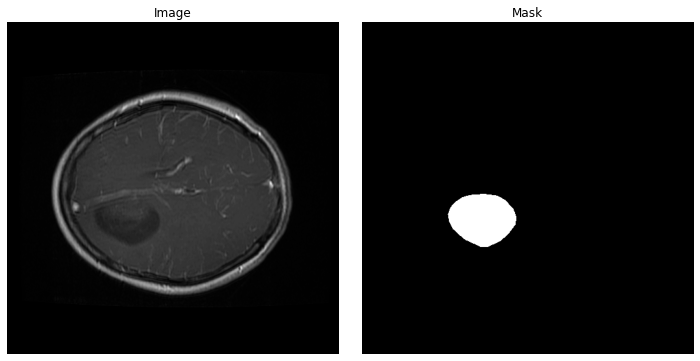

In [11]:
def plot_image_and_mask(img, mask):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('Image')
    axes[1].imshow(mask, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('Mask')
    plt.tight_layout()
    plt.show()

# Open the HDF5 file in read-only mode
filename = '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/all_mat_files_data/2000.mat'
with h5py.File(filename, 'r') as f:
    # Print the keys of the root group
    print("Keys in root group:", list(f.keys()))

    # Print the items (key, value pairs) of the root group
    print("Items in root group:")
    for key, val in f.items():
        print(key, ":", val)

    # Access specific datasets in the file
    img = np.array(f['cjdata/image'], dtype=np.float32)
    label = f['cjdata/label'][0][0]
    tumorBorder = f['cjdata/tumorBorder'][0]
    mask = np.array(f['cjdata/tumorMask'], dtype=np.float32)
    
    # Access patient ID (cjdata.PID)
    patient_id = f['cjdata/PID'][0]

    # Normalize the image and mask
    img = img / 127.5 - 1
    mask = mask / 127.5 - 1

    # Print information and plot the image and mask
    print("Patient ID:", patient_id)
    print("Image shape:", img.shape)
    print("Label:", label)
    print("Tumor Border Coords:", tumorBorder)
    print("Mask shape:", mask.shape)
    plot_image_and_mask(img, mask)#to display tumor image and mask


cjdata
cjdata <HDF5 group "/cjdata" (5 members)>
Patient ID: 56
Image shape: (512, 512)
Label: 1.0
Tumor Border Coords: [249.46635731 167.49883991 275.60092807 177.00232019 295.79582367
 185.31786543 318.36658933 163.9350348  305.29930394 146.11600928
 292.23201856 122.35730858 268.47331787 111.66589327 248.27842227
 125.92111369]
Mask shape: (512, 512)


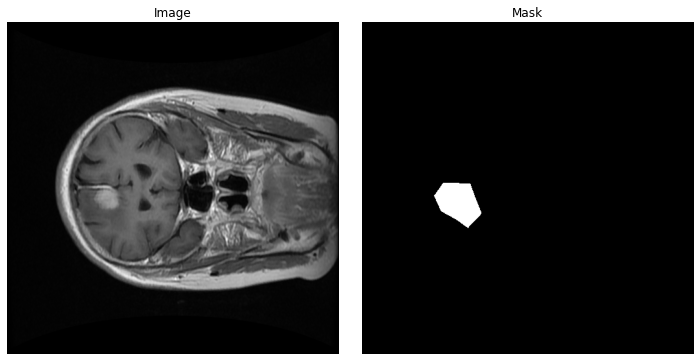

In [12]:
def print_keys(group):
    for key in group.keys():
        print(key)

def print_items(group):
    for key, val in group.items():
        print(key, val)

def plot_image(img, mask):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('Image')
    axes[1].imshow(mask, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('Mask')
    plt.tight_layout()
    plt.show()

# Open the HDF5 file in read-only mode
filename = '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/all_mat_files_data/3064.mat'
with h5py.File(filename, 'r') as f:
    # Print the keys of the root group
    print_keys(f)

    # Print the items (key, value pairs) of the root group
    print_items(f)

    # Access specific datasets in the file
    img = np.array(f['cjdata/image'], dtype=np.float32)
    label = f['cjdata/label'][0][0]
    tumorBorder = f['cjdata/tumorBorder'][0]
    mask = np.array(f['cjdata/tumorMask'], dtype=np.float32)

    # Access patient ID (cjdata.PID)
    #patient_id = f['cjdata/PID'][0]
    patient_id = f['cjdata']['PID'][0][0]
    
    # Normalize the image and mask
    img = img / 127.5 - 1
    mask = mask / 127.5 - 1

    # Print information and plot the image and mask
    print("Patient ID:", patient_id)
    print("Image shape:", img.shape)
    print("Label:", label)
    print("Tumor Border Coords:", tumorBorder)
    print("Mask shape:", mask.shape)
    plot_image(img, mask)


cjdata
cjdata <HDF5 group "/cjdata" (5 members)>
Dataset paths and values within 'cjdata' group:
Dataset path: /cjdata/PID
Dataset value: [[57]
 [57]
 [48]
 [56]
 [57]]
Dataset path: /cjdata/image
Dataset value: [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Dataset path: /cjdata/label
Dataset value: [[1.]]
Dataset path: /cjdata/tumorBorder
Dataset value: [[268.64636679 177.93460657 261.08705343 183.749463   260.50556779
  194.7976902  257.59813958 200.03106098 256.4351683  204.68294612
  261.08705343 213.40523076 265.15745293 219.80157282 272.13528064
  222.12751539 277.95013706 222.70900104 282.02053656 222.70900104
  284.34647913 223.29048668 290.7428212  223.29048668 294.23173505
  219.80157282 298.30213455 213.40523076 299.46510583 208.17185998
  300.04659148 198.8680897  301.20956276 187.81986249 294.81322069
  181.42352043 283.18350785 175.608664   276.20568014 175.608664
  268.06488114 179.09757786]]
Datas

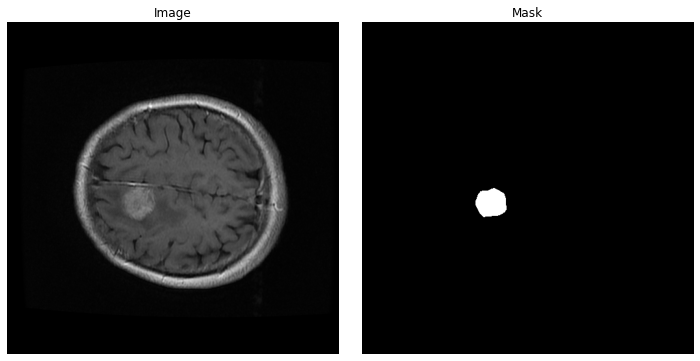

In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def print_keys(group):
    for key in group.keys():
        print(key)

def print_items(group):
    for key, val in group.items():
        print(key, val)

def print_dataset_paths(group):
    def print_paths(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"Dataset path: {obj.name}")
            print(f"Dataset value: {obj[:]}")
    
    group.visititems(print_paths)

def plot_image(img, mask):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('Image')
    axes[1].imshow(mask, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('Mask')
    plt.tight_layout()
    plt.show()

# Open the HDF5 file in read-only mode
filename = '/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/all_mat_files_data/200.mat'
with h5py.File(filename, 'r') as f:
    # Print the keys of the root group
    print_keys(f)

    # Print the items (key, value pairs) of the root group
    print_items(f)

    # Print the dataset paths and values within the 'cjdata' group
    print("Dataset paths and values within 'cjdata' group:")
    print_dataset_paths(f['cjdata'])

    # Access specific datasets in the file
    img = np.array(f['cjdata/image'], dtype=np.float32)
    label = f['cjdata/label'][0][0]
    tumorBorder = f['cjdata/tumorBorder'][0]
    mask = np.array(f['cjdata/tumorMask'], dtype=np.float32)

    # Normalize the image and mask
    img = img / 127.5 - 1
    mask = mask / 127.5 - 1

    # Print information and plot the image and mask
    print("Image shape:", img.shape)
    print("Label:", label)
    print("Tumor Border Coords:", tumorBorder)
    print("Mask shape:", mask.shape)
    plot_image(img, mask)


In [14]:
# Create new directories
dataset_dir = Path('/Users/shyamsonu/Downloads/Brain Tumor Model/Final_Brain_Tumor_Dataset')
images_dir = Path('/Users/shyamsonu/Downloads/Brain Tumor Model/Final_Brain_Tumor_Dataset/Brain_Tumor_images')
mask_dir = Path('/Users/shyamsonu/Downloads/Brain Tumor Model/Final_Brain_Tumor_Dataset/Brain_Tumor_images_mask')
dataset_dir.mkdir(parents=True, exist_ok=True)
images_dir.mkdir(parents=True, exist_ok=True)
mask_dir.mkdir(parents=True, exist_ok=True)

#### Creating 2 folders to store image and mask in jpg format 

#### Create empty lists for storing labels  and border 

In [15]:
# Create directories for saving images and the dataset
dataset_dir = Path('/Users/shyamsonu/Downloads/Brain Tumor Model/Final_Brain_Tumor_Dataset')
images_dir = dataset_dir / 'Brain_Tumor_images'
masks_dir = dataset_dir / 'Brain_Tumor_images_mask'
dataset_dir.mkdir(parents=True, exist_ok=True)
images_dir.mkdir(parents=True, exist_ok=True)
masks_dir.mkdir(parents=True, exist_ok=True)

# Initialize lists for labels and border coordinates
labels = []
border = []

# Iterate through a range of filenames
for filename in range(1, 3065):
    # Open the HDF5 file in read mode
    with h5py.File(f'/Users/shyamsonu/Downloads/Brain Tumor Model/Brain Tumor dataset/all_mat_files_data/{filename}.mat', 'r') as f:
        
        # Access image and label datasets
        img = np.array(f['cjdata/image'], dtype=np.float32)
        label = f['cjdata/label'][0][0]
        tumorBorder = f['cjdata/tumorBorder'][0]
        mask = np.array(f['cjdata/tumorMask'], dtype=np.float32)

        # Append label to the labels list
        labels.append(int(label))

        # Append border coordinates to the border list
        border.append(tumorBorder)

        # Normalize the image and mask
        img = img / 127.5 - 1
        mask = mask / 127.5 - 1

        # Save the image as a JPEG file
        plt.axis('off')
        plt.imshow(img, cmap='gray')
        plt.savefig(f'{images_dir}/{filename}.jpg', bbox_inches='tight')
        plt.close()

        # Save the mask as a JPEG file
        plt.axis('off')
        plt.imshow(mask, cmap='gray')
        plt.savefig(f'{masks_dir}/{filename}.jpg', bbox_inches='tight')
        plt.close()

# Print the number of files saved
print(f"{filename} files successfully saved")


3064 files successfully saved


In [16]:
# Get the list of files in the images directory
images_files = os.listdir(images_dir)

# Get the number of images in the images directory
num_images = len(images_files)

# Get the list of files in the masks directory
masks_files = os.listdir(masks_dir)

# Get the number of images in the masks directory
num_masks = len(masks_files)

# Print the number of images in each directory
print(f"Number of images in {images_dir}: {num_images}")
print(f"Number of images in {masks_dir}: {num_masks}")


Number of images in /Users/shyamsonu/Downloads/Brain Tumor Model/Final_Brain_Tumor_Dataset/Brain_Tumor_images: 3064
Number of images in /Users/shyamsonu/Downloads/Brain Tumor Model/Final_Brain_Tumor_Dataset/Brain_Tumor_images_mask: 3064


#### label

In [17]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [18]:
len(labels)

3064

##### 1 for meningioma
##### 2 for glioma
##### 3 for pituitary tumor

In [19]:
label_1 = labels.count(1)
label_2 = labels.count(2)
label_3 = labels.count(3)

# Print the count
print("Number of times label_1 is labels list:", label_1)
print("Number of times label_2 is labels list:", label_2)
print("Number of times label_3 is labels list:", label_3)

Number of times label_1 is labels list: 708
Number of times label_2 is labels list: 1426
Number of times label_3 is labels list: 930


#### border

In [20]:
border[:2]

[array([267.61524501, 231.37568058, 277.83666062, 248.10163339,
        289.91651543, 250.8892922 , 305.71324864, 253.676951  ,
        318.72232305, 249.9600726 , 321.50998185, 237.88021779,
        354.96188748, 234.16333938, 367.97096189, 227.65880218,
        380.9800363 , 210.93284936, 372.61705989, 195.13611615,
        363.32486388, 177.48094374, 350.31578947, 176.55172414,
        336.37749546, 183.98548094, 317.79310345, 196.06533575,
        305.71324864, 207.21597096, 295.49183303, 217.43738657,
        288.98729583, 222.08348457, 273.19056261, 223.94192377,
        268.54446461, 228.58802178]),
 array([319.33101045, 153.42160279, 302.38327526, 161.44947735,
        292.57142857, 160.55749129, 283.65156794, 165.90940767,
        272.94773519, 176.61324042, 268.48780488, 184.64111498,
        269.37979094, 195.34494774, 270.271777  , 200.69686411,
        264.02787456, 209.61672474, 264.91986063, 215.86062718,
        272.94773519, 222.99651568, 267.59581882, 231.91637631,
  

In [21]:
len(border)

3064

In [55]:
#label_names = np.array(labels, dtype=np.int64)

Read the images from Brain_Tumor_images folder from given path
and convert it to jpg images and store it along with their respective labels in the  df.

In [22]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [28]:
data_dir = Path('/Users/shyamsonu/Downloads/Brain Tumor Model/Final_Brain_Tumor_Dataset/Brain_Tumor_images')

# Populate the list of label names corresponding to each image
labels = labels #list of label names (3064 elements)

# Initialize an empty list for storing the preprocessed data
data_1 = []

# Iterate through a range of filenames
for i in range(1, 3065):
    # Read the image in grayscale
    img = cv2.imread(str(data_dir / f'{i}.jpg'), cv2.IMREAD_GRAYSCALE)
    
    # Convert the image to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Resize the image to (512, 512)
    img = cv2.resize(img, (512, 512))
    
    # Get the label for the current image
    label = labels[i - 1]
    
    # Append the preprocessed image and label to the training_data list
    data_1.append([img, label])

    # Print the shape, label, and number of samples processed
    print("shape: {} | label: {} | {} samples successfully preprocessed".format(img.shape, label, i))



shape: (512, 512, 3) | label: 1 | 1 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 2 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 3 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 4 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 5 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 6 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 7 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 8 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 9 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 10 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 11 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 12 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 13 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 14 samples successfully preprocessed
shape: (512, 51

shape: (512, 512, 3) | label: 1 | 442 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 443 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 444 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 445 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 446 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 447 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 448 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 449 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 450 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 451 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 452 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 453 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 454 samples successfully preprocessed
shape: (512, 512, 3) | label: 1 | 455 samples successfully prepr

shape: (512, 512, 3) | label: 2 | 903 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 904 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 905 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 906 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 907 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 908 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 909 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 910 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 911 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 912 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 913 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 914 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 915 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 916 samples successfully prepr

shape: (512, 512, 3) | label: 3 | 1366 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1367 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1368 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1369 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1370 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1371 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1372 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1373 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1374 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1375 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1376 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1377 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1378 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1379 samples succ

shape: (512, 512, 3) | label: 3 | 1807 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1808 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1809 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1810 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1811 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1812 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1813 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1814 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1815 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1816 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1817 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1818 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1819 samples successfully preprocessed
shape: (512, 512, 3) | label: 3 | 1820 samples succ

shape: (512, 512, 3) | label: 2 | 2282 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2283 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2284 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2285 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2286 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2287 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2288 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2289 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2290 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2291 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2292 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2293 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2294 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2295 samples succ

shape: (512, 512, 3) | label: 2 | 2755 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2756 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2757 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2758 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2759 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2760 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2761 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2762 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2763 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2764 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2765 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2766 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2767 samples successfully preprocessed
shape: (512, 512, 3) | label: 2 | 2768 samples succ

In [29]:
type(data_1)

list

In [30]:
data_1[:1]

[[array([[[253, 253, 253],
          [253, 253, 253],
          [254, 254, 254],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[253, 253, 253],
          [253, 253, 253],
          [254, 254, 254],
          ...,
          [255, 255, 255],
          [254, 254, 254],
          [254, 254, 254]],
  
         [[254, 254, 254],
          [254, 254, 254],
          [253, 253, 253],
          ...,
          [254, 254, 254],
          [253, 253, 253],
          [253, 253, 253]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [31]:
# Create a DataFrame from the data_1 list
df = pd.DataFrame(data_1, columns=['image', 'label'])

In [32]:
df.head()

,image,label
0,"[[[253, 253, 253], [253, 253, 253], [254, 254,...",1
1,"[[[253, 253, 253], [253, 253, 253], [254, 254,...",1
2,"[[[253, 253, 253], [253, 253, 253], [254, 254,...",1
3,"[[[253, 253, 253], [253, 253, 253], [254, 254,...",1
4,"[[[253, 253, 253], [253, 253, 253], [254, 254,...",1


In [33]:
df["label"].value_counts()

label
2    1426
3     930
1     708
Name: count, dtype: int64

### main DataFrame

In [34]:
labels[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [35]:
# Creating an empty list to store the data
data = []

# Looping through the image indices
for i in range(1, 3065):
    # Getting the image path
    image_path = "/Users/shyamsonu/Downloads/Brain Tumor Model/Final_Brain_Tumor_Dataset/Brain_Tumor_images/{}.jpg".format(i)
    
    # Getting the label for the current image
    label = labels[i-1]
    
    # Append the image path and label to the data list
    data.append({'image_path': image_path, 'label': label})

# Creating a DataFrame from the data list
df = pd.DataFrame(data)

# Printing the first few rows of the DataFrame
df.head()


,image_path,label
0,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,1
1,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,1
2,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,1
3,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,1
4,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,1


In [36]:
df["label"].value_counts()

label
2    1426
3     930
1     708
Name: count, dtype: int64

In [37]:
df["label"].unique()

array([1, 3, 2])

In [38]:
# Save the DataFrame as a CSV file
df.to_csv('Brain_Tumor_ImagePath_Label.csv', index=False)

#### Displaying 3 Tumor images

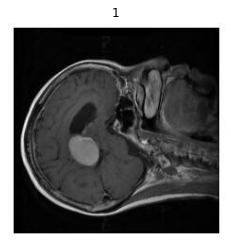

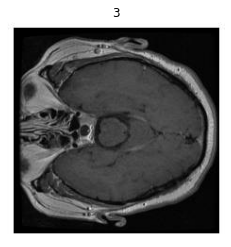

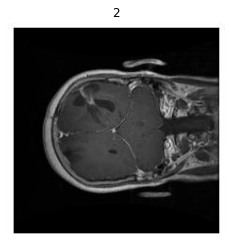

In [39]:
# Get unique tumor labels from the DataFrame
unique_tumors = df['label'].unique()

# Set the number of unique tumors to print
num_unique_tumors = 3

# Select random unique tumors
selected_tumors = np.random.choice(unique_tumors, num_unique_tumors, replace=False)

# Loop through the selected unique tumors
for tumor in selected_tumors:
    # Get a random image with the selected tumor label
    selected_image = df[df['label'] == tumor].sample(1)
    
    # Read the image using OpenCV
    img = cv2.imread(selected_image['image_path'].values[0])
    
    # Convert the image to RGB for display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image with the corresponding tumor label
    plt.imshow(img)
    plt.title(tumor)
    plt.axis('off')
    plt.show()

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import shutil
import os
from PIL import Image
import tempfile

from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize
from PIL import Image
import cv2
import random

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Dropout, MaxPool2D , Activation, Flatten, Dense, AvgPool2D, Lambda, BatchNormalization, Input

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical,plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.metrics import accuracy_score
import visualkeras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0-rc1


In [4]:
data_df = pd.read_csv("Brain_Tumor_ImagePath_Label.csv")
data_df

,image_path,label
0,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,1
1,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,1
2,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,1
3,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,1
4,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,1
...,...,...
3059,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,2
3060,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,2
3061,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,2
3062,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,1


In [5]:
data_df["label"].value_counts()

label
2    1426
3     930
1     708
Name: count, dtype: int64

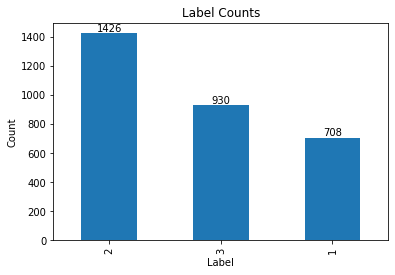

In [8]:
label_counts = data_df["label"].value_counts()

# Plotting the bar chart
ax = label_counts.plot.bar()

# Adding count values on top of each bar
for i, count in enumerate(label_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Displaying the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')
plt.show()


### Replacing

1 : "meningioma"

2 : "glioma"

3: "pituitary"

In [10]:
# Define the mapping of numerical labels to class names
label_mapping = {
   1: "meningioma",
    2: "glioma",
    3: "pituitary"
}

# Replace numerical labels with class names
data_df["label"] = data_df["label"].replace(label_mapping)

# Display the modified DataFrame
data_df


,image_path,label
0,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,meningioma
1,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,meningioma
2,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,meningioma
3,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,meningioma
4,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,meningioma
...,...,...
3059,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,glioma
3060,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,glioma
3061,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,glioma
3062,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,meningioma


In [11]:
data_df["label"].value_counts()

label
glioma        1426
pituitary      930
meningioma     708
Name: count, dtype: int64

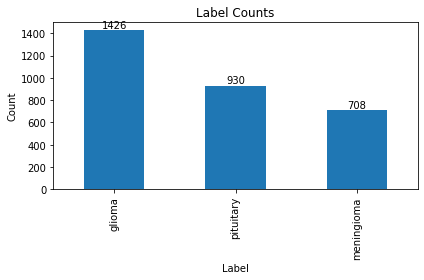

In [22]:
# Plot the counts of each label
ax = data_df["label"].value_counts().plot(kind='bar')

# Set the plot title and axes labels
plt.title("Label Counts")
plt.xlabel("Label")
plt.ylabel("Count")

# Add the count as text on each bar
for i, count in enumerate(data_df["label"].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')


# Display the plot
plt.tight_layout()
plt.show()

### Copy the dataframe¶

In [14]:
df = data_df.copy()

In [15]:
df.head()

,image_path,label
0,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,meningioma
1,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,meningioma
2,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,meningioma
3,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,meningioma
4,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,meningioma


In [16]:
df["label"].value_counts()

label
glioma        1426
pituitary      930
meningioma     708
Name: count, dtype: int64

### Enconding

"meningioma": 0

"glioma": 1

"pituitary": 2

In [17]:
# Define the encoding mapping
encoding_mapping = {
    "meningioma": 0,
    "glioma": 1,
    "pituitary": 2
}

# Encode the categorical values in the "label" column
df["label"] = df["label"].replace(encoding_mapping)

# Display the modified DataFrame
print(df["label"])

0       0
1       0
2       0
3       0
4       0
       ..
3059    1
3060    1
3061    1
3062    0
3063    0
Name: label, Length: 3064, dtype: int64


In [19]:
df.head()

,image_path,label
0,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0
1,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0
2,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0
3,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0
4,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0


In [18]:
df["label"].value_counts()

label
1    1426
2     930
0     708
Name: count, dtype: int64

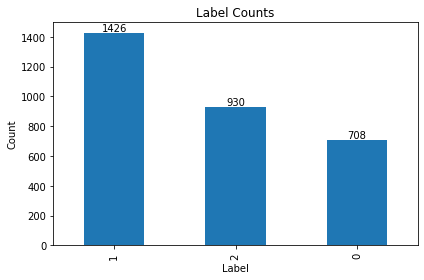

In [21]:
# Plot the counts of each label
ax = df["label"].value_counts().plot(kind='bar')

# Set the plot title and axes labels
plt.title("Label Counts")
plt.xlabel("Label")
plt.ylabel("Count")

# Add the count as text on each bar
for i, count in enumerate(df["label"].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [23]:
df.head(2)

,image_path,label
0,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0
1,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0


In [34]:
# Convert the "label" column to string type
df["label"] = df["label"].astype(str)


In [35]:
df["label"].value_counts()

label
1    1426
2     930
0     708
Name: count, dtype: int64

In [36]:
set(df["label"])

{'0', '1', '2'}

#### Splitting dataframe into Train, Test, Validation¶

In [37]:
# Split the data into training and testing sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)


# Split the training data into training and validation sets (80% train, 20% validation)
#train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Print the lengths of the resulting datasets
print("Training set length:", len(train_df))
#print("Validation set length:", len(val_df))
print("Testing set length:", len(test_df))


Training set length: 2451
Testing set length: 613


In [38]:
# Perform 5-fold cross-validation on the training set
fold_train_dfs = []
fold_val_dfs = []

for i in range(5):
    fold_train, fold_val = train_test_split(train_df, test_size=0.2, random_state=i)
    fold_train_dfs.append(fold_train)
    fold_val_dfs.append(fold_val)

# Print the lengths of the fold datasets
for i in range(5):
    print("Fold", i+1)
    print("Training set length:", len(fold_train_dfs[i]))
    print("Validation set length:", len(fold_val_dfs[i]))

# Set the test set as the final evaluation set
evaluation_set = test_df

# Print the length of the evaluation set
print("Evaluation set length:", len(evaluation_set))

Fold 1
Training set length: 1960
Validation set length: 491
Fold 2
Training set length: 1960
Validation set length: 491
Fold 3
Training set length: 1960
Validation set length: 491
Fold 4
Training set length: 1960
Validation set length: 491
Fold 5
Training set length: 1960
Validation set length: 491
Evaluation set length: 613


In [1]:
1960+491

2451

In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    zoom_range=[0.75, 1],
    featurewise_center=True,
    featurewise_std_normalization=True
)


In [40]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    zoom_range=[0.75, 1],
    featurewise_center=True,
    featurewise_std_normalization=True
)

In [41]:
df.columns

Index(['image_path', 'label'], dtype='object')

Fold 1
Found 1960 validated image filenames belonging to 3 classes.
Found 491 validated image filenames belonging to 3 classes.
Epoch 1/10


/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


62/62 [==============================] - 184s 3s/step - loss: 0.5364 - accuracy: 0.7806 - val_loss: 33.3449 - val_accuracy: 0.2424
Epoch 2/10
62/62 [==============================] - 183s 3s/step - loss: 0.3080 - accuracy: 0.8837 - val_loss: 3.0034 - val_accuracy: 0.5642
Epoch 3/10
62/62 [==============================] - 187s 3s/step - loss: 0.2997 - accuracy: 0.8878 - val_loss: 0.6273 - val_accuracy: 0.8126
Epoch 4/10
62/62 [==============================] - 189s 3s/step - loss: 0.2232 - accuracy: 0.9168 - val_loss: 9.6013 - val_accuracy: 0.6395
Epoch 5/10
62/62 [==============================] - 191s 3s/step - loss: 0.2486 - accuracy: 0.9051 - val_loss: 5.5867 - val_accuracy: 0.5397
Epoch 6/10
62/62 [==============================] - 193s 3s/step - loss: 0.1970 - accuracy: 0.9260 - val_loss: 1.5075 - val_accuracy: 0.7169
Epoch 7/10
62/62 [==============================] - 196s 3s/step - loss: 0.2300 - accuracy: 0.9153 - val_loss: 0.7443 - val_accuracy: 0.7658
Epoch 8/10
62/62 [=====

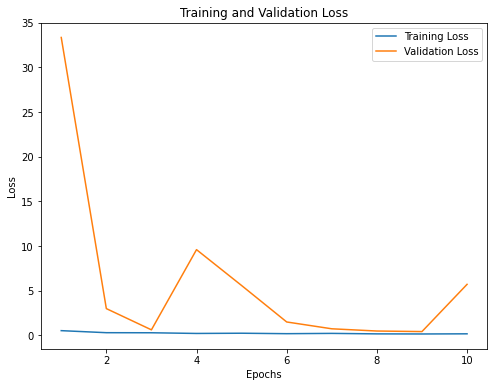

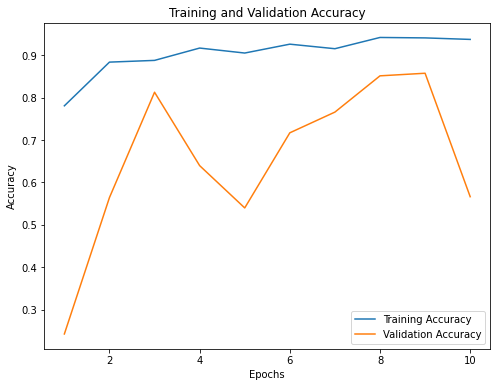

Fold 2
Found 1960 validated image filenames belonging to 3 classes.
Found 491 validated image filenames belonging to 3 classes.


/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
62/62 [==============================] - 207s 3s/step - loss: 0.2426 - accuracy: 0.9107 - val_loss: 0.3514 - val_accuracy: 0.8574
Epoch 2/10
62/62 [==============================] - 213s 3s/step - loss: 0.1789 - accuracy: 0.9342 - val_loss: 0.6641 - val_accuracy: 0.8248
Epoch 3/10
62/62 [==============================] - 215s 3s/step - loss: 0.1934 - accuracy: 0.9306 - val_loss: 1.1385 - val_accuracy: 0.6904
Epoch 4/10
62/62 [==============================] - 217s 4s/step - loss: 0.1334 - accuracy: 0.9449 - val_loss: 0.5684 - val_accuracy: 0.8330
Epoch 5/10
62/62 [==============================] - 215s 3s/step - loss: 0.1278 - accuracy: 0.9607 - val_loss: 0.4685 - val_accuracy: 0.8126
Epoch 6/10
62/62 [==============================] - 216s 3s/step - loss: 0.1461 - accuracy: 0.9429 - val_loss: 2.9785 - val_accuracy: 0.6232
Epoch 7/10
62/62 [==============================] - 214s 3s/step - loss: 0.1315 - accuracy: 0.9546 - val_loss: 0.3020 - val_accuracy: 0.8859
Epoch 8/10
62

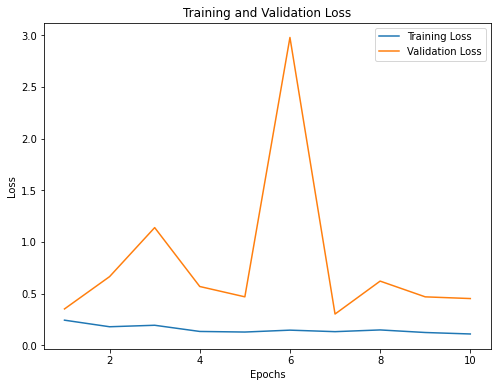

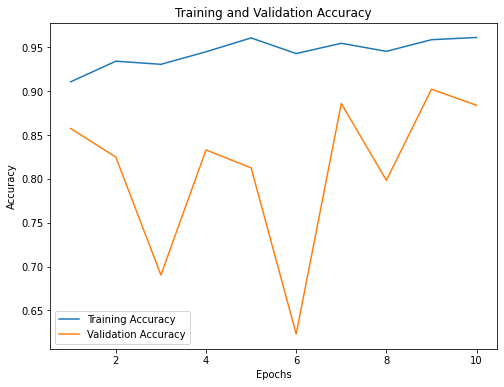

Fold 3
Found 1960 validated image filenames belonging to 3 classes.
Found 491 validated image filenames belonging to 3 classes.


/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
62/62 [==============================] - 222s 4s/step - loss: 0.1242 - accuracy: 0.9582 - val_loss: 0.5748 - val_accuracy: 0.8513
Epoch 2/10
62/62 [==============================] - 221s 4s/step - loss: 0.1018 - accuracy: 0.9663 - val_loss: 0.2637 - val_accuracy: 0.8921
Epoch 3/10
62/62 [==============================] - 220s 4s/step - loss: 0.1532 - accuracy: 0.9459 - val_loss: 0.2080 - val_accuracy: 0.9287
Epoch 4/10
62/62 [==============================] - 221s 4s/step - loss: 0.1435 - accuracy: 0.9515 - val_loss: 1.0162 - val_accuracy: 0.7067
Epoch 5/10
62/62 [==============================] - 221s 4s/step - loss: 0.0987 - accuracy: 0.9668 - val_loss: 2.0153 - val_accuracy: 0.6538
Epoch 6/10
62/62 [==============================] - 223s 4s/step - loss: 0.0847 - accuracy: 0.9653 - val_loss: 0.3711 - val_accuracy: 0.8676
Epoch 7/10
62/62 [==============================] - 222s 4s/step - loss: 0.1248 - accuracy: 0.9510 - val_loss: 0.2309 - val_accuracy: 0.9287
Epoch 8/10
62

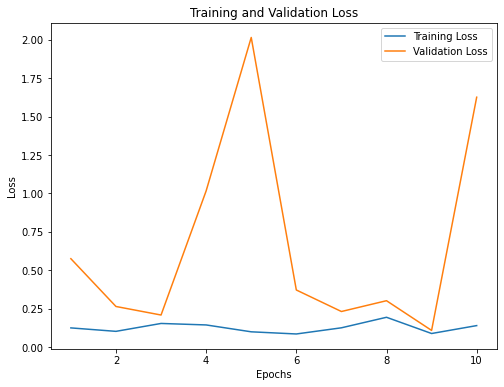

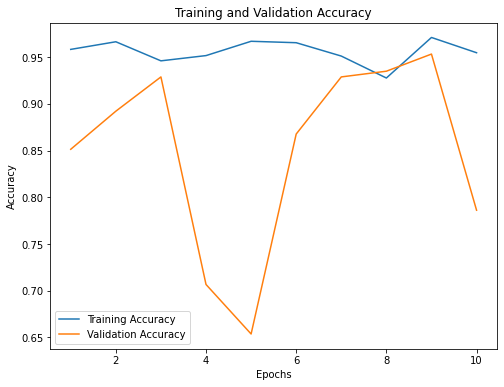

Fold 4
Found 1960 validated image filenames belonging to 3 classes.
Found 491 validated image filenames belonging to 3 classes.


/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
62/62 [==============================] - 222s 4s/step - loss: 0.0956 - accuracy: 0.9663 - val_loss: 0.0573 - val_accuracy: 0.9837
Epoch 2/10
62/62 [==============================] - 222s 4s/step - loss: 0.0905 - accuracy: 0.9679 - val_loss: 0.2382 - val_accuracy: 0.9124
Epoch 3/10
62/62 [==============================] - 221s 4s/step - loss: 0.0683 - accuracy: 0.9806 - val_loss: 0.1388 - val_accuracy: 0.9593
Epoch 4/10
62/62 [==============================] - 220s 4s/step - loss: 0.0940 - accuracy: 0.9673 - val_loss: 0.4351 - val_accuracy: 0.8900
Epoch 5/10
62/62 [==============================] - 221s 4s/step - loss: 0.1038 - accuracy: 0.9653 - val_loss: 0.1817 - val_accuracy: 0.9389
Epoch 6/10
62/62 [==============================] - 221s 4s/step - loss: 0.0979 - accuracy: 0.9597 - val_loss: 0.2772 - val_accuracy: 0.9104
Epoch 7/10
62/62 [==============================] - 219s 4s/step - loss: 0.0645 - accuracy: 0.9791 - val_loss: 0.1382 - val_accuracy: 0.9348
Epoch 8/10
62

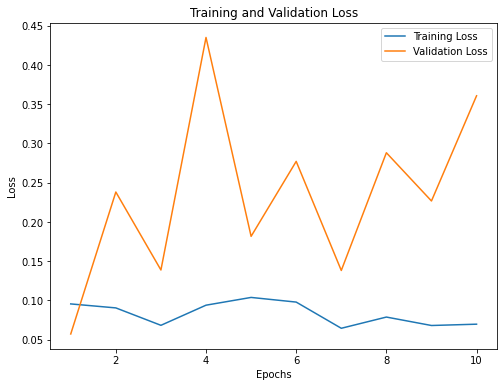

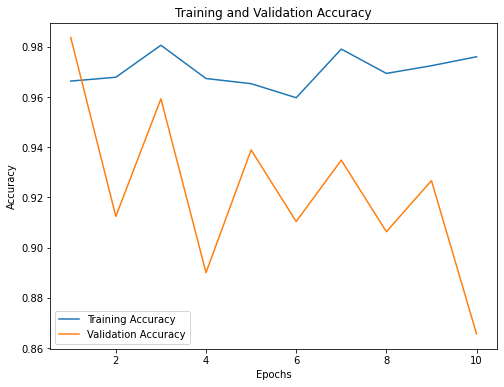

Fold 5
Found 1960 validated image filenames belonging to 3 classes.
Found 491 validated image filenames belonging to 3 classes.


/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
62/62 [==============================] - 213s 3s/step - loss: 0.0726 - accuracy: 0.9735 - val_loss: 0.1821 - val_accuracy: 0.9226
Epoch 2/10
62/62 [==============================] - 214s 3s/step - loss: 0.1385 - accuracy: 0.9526 - val_loss: 0.9539 - val_accuracy: 0.7617
Epoch 3/10
62/62 [==============================] - 214s 3s/step - loss: 0.1474 - accuracy: 0.9434 - val_loss: 0.8773 - val_accuracy: 0.7841
Epoch 4/10
62/62 [==============================] - 214s 3s/step - loss: 0.1531 - accuracy: 0.9469 - val_loss: 0.1761 - val_accuracy: 0.9369
Epoch 5/10
62/62 [==============================] - 215s 3s/step - loss: 0.0992 - accuracy: 0.9633 - val_loss: 0.1387 - val_accuracy: 0.9532
Epoch 6/10
62/62 [==============================] - 223s 4s/step - loss: 0.0682 - accuracy: 0.9760 - val_loss: 0.2670 - val_accuracy: 0.9450
Epoch 7/10
62/62 [==============================] - 222s 4s/step - loss: 0.0755 - accuracy: 0.9724 - val_loss: 0.2436 - val_accuracy: 0.9104
Epoch 8/10
62

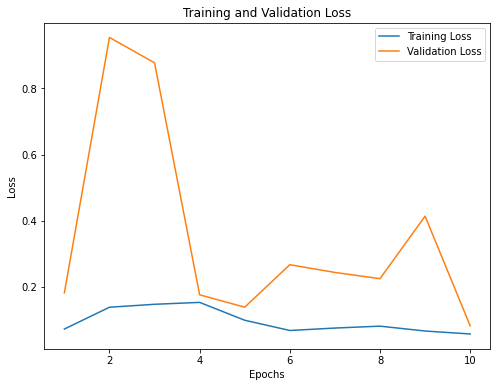

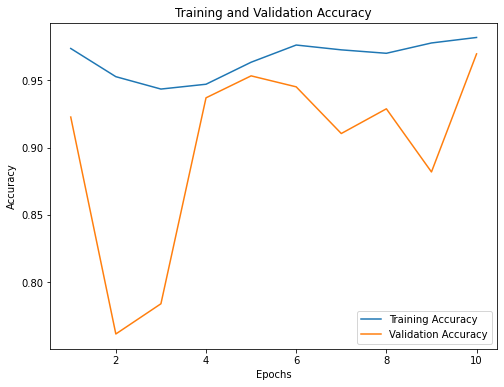

In [43]:
from keras.applications import InceptionV3

# Define the input shape
input_shape = (224, 224, 3)

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a global average pooling layer and a dense output layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Initialize lists to store loss and accuracy values
all_train_loss = []
all_val_loss = []
all_train_acc = []
all_val_acc = []

# Loop through the folds and fit the model
for i in range(5):
    print("Fold", i+1)
    # Get the current fold's training and validation sets
    fold_train = fold_train_dfs[i]
    fold_val = fold_val_dfs[i]

    # Create the data generators for the current fold
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=fold_train,
        x_col='image_path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='sparse'
    )
    
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=fold_val,
        x_col='image_path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=2022,
        shuffle=True,
        class_mode='sparse'
    )

    # Fit the model on the current fold's training and validation data
    history = model.fit(
        train_generator,
        epochs=epochs,
        verbose=1,
        validation_data=val_generator
    )
    
    # Print the training and validation loss and accuracy
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    print("Training Loss:", train_loss)
    print("Validation Loss:", val_loss)
    print("Training Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)
    
    # Append the loss and accuracy values to the lists
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)
    all_train_acc.append(train_acc)
    all_val_acc.append(val_acc)
    
    # Plot the training and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
    plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    # Plot the training and validation accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, epochs+1), train_acc, label='Training Accuracy')
    plt.plot(range(1, epochs+1), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()



In [52]:
print(all_train_loss)
print(all_val_loss)
print(all_train_acc)
print(all_val_acc)

[[0.5364165902137756, 0.3080448806285858, 0.29969075322151184, 0.2231597602367401, 0.24860258400440216, 0.19698359072208405, 0.22996921837329865, 0.17616654932498932, 0.1644427329301834, 0.18194679915905], [0.24260324239730835, 0.1789238303899765, 0.19335134327411652, 0.13343943655490875, 0.1277768611907959, 0.14606927335262299, 0.13147148489952087, 0.14815039932727814, 0.1232801079750061, 0.10902941972017288], [0.12422744184732437, 0.10175055265426636, 0.15317191183567047, 0.14349985122680664, 0.09874968230724335, 0.08465786278247833, 0.1248072013258934, 0.19338180124759674, 0.08767987042665482, 0.13919836282730103], [0.09556511044502258, 0.09048675000667572, 0.0683039054274559, 0.09395164251327515, 0.10383609682321548, 0.09789921343326569, 0.06452614068984985, 0.07881758362054825, 0.06806839257478714, 0.06974145025014877], [0.07258407771587372, 0.13848066329956055, 0.14738647639751434, 0.1531362682580948, 0.09917283803224564, 0.06820091605186462, 0.07554853707551956, 0.08131228387355

In [54]:
# Calculate and print the average loss and accuracy
avg_train_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_train_loss]
avg_val_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_val_loss]
avg_train_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_train_acc]
avg_val_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_val_acc]

print("Average Training Loss:", avg_train_loss)
print("Average Validation Loss:", avg_val_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Accuracy:", avg_val_acc)

Average Training Loss: [0.2565423458814621, 0.1534095399081707, 0.12511245384812356, 0.08311962857842445, 0.09600724391639233]
Average Validation Loss: [6.106113049387932, 0.8012070566415787, 0.6715367272496223, 0.234207109361887, 0.35595213398337366]
Average Training Accuracy: [0.903520405292511, 0.9443877518177033, 0.9558163285255432, 0.9704081594944001, 0.9657142877578735]
Average Validation Accuracy: [0.6556008189916611, 0.8112016260623932, 0.8503054976463318, 0.9228105962276458, 0.8993890106678009]


In [57]:
a=sum([0.2565423458814621, 0.1534095399081707, 0.12511245384812356, 0.08311962857842445, 0.09600724391639233])

In [58]:
a

0.7141912121325732

In [59]:
a/5

0.14283824242651463

In [55]:
# Calculate and print the average loss and accuracy
mean_train_loss = sum(avg_train_loss) / len(avg_train_loss)
mean_val_loss = sum(avg_val_loss) / len(avg_val_loss)
mean_train_acc = sum(avg_train_acc) / len(avg_train_acc)
mean_val_acc = sum(avg_val_acc) / len(avg_val_acc)

print("Mean Training Loss:", mean_train_loss)
print("Mean Validation Loss:", mean_val_loss)
print("Mean Training Accuracy:", mean_train_acc)
print("Mean Validation Accuracy:", mean_val_acc)

Mean Training Loss: 0.14283824242651463
Mean Validation Loss: 1.6338032153248787
Mean Training Accuracy: 0.9479693865776062
Mean Validation Accuracy: 0.8278615099191666


In [48]:
# Evaluate the model on the evaluation set
test_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_std_normalization=True
)

evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='sparse'
)

evaluation_loss, evaluation_accuracy = model.evaluate(evaluation_generator)

print("Evaluation Loss:", evaluation_loss)
print("Evaluation Accuracy:", evaluation_accuracy)

Found 613 validated image filenames belonging to 3 classes.


/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


20/20 [==============================] - 11s 531ms/step - loss: 0.0723 - accuracy: 0.9821
Evaluation Loss: 0.07226403057575226
Evaluation Accuracy: 0.9820554852485657


### Evaluation Accuracy: 0.9820554852485657

20/20 [==============================] - 11s 529ms/step


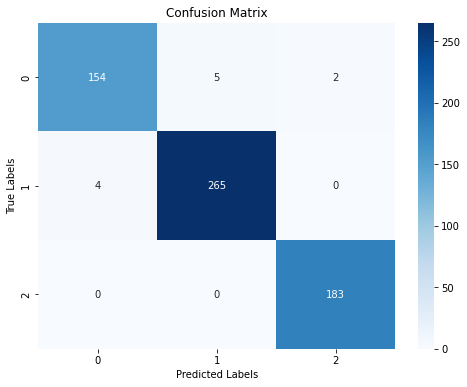

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       161
           1       0.98      0.99      0.98       269
           2       0.99      1.00      0.99       183

    accuracy                           0.98       613
   macro avg       0.98      0.98      0.98       613
weighted avg       0.98      0.98      0.98       613



In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get the predicted labels
y_pred = model.predict(evaluation_generator).argmax(axis=1)

# Get the true labels
y_true = evaluation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = list(evaluation_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


#### Predictions

/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


20/20 [==============================] - 11s 534ms/step


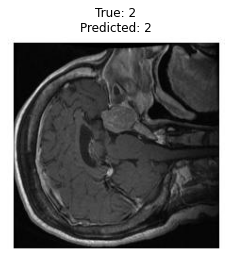

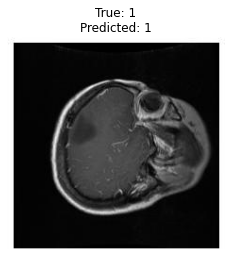

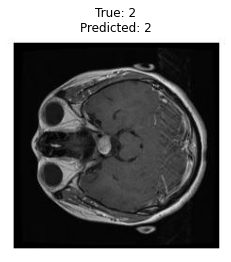

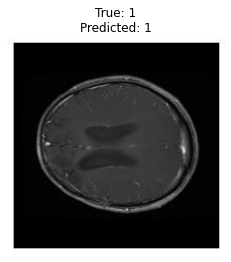

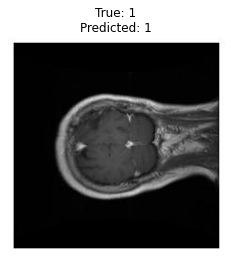

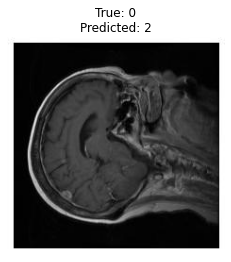

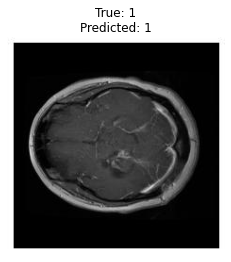

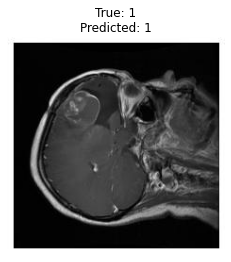

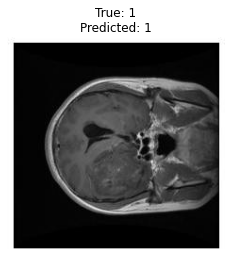

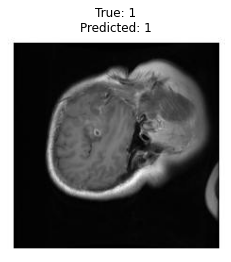

In [50]:
# Get the class labels
class_labels = train_generator.class_indices

# Generate predictions on the test set
predictions = model.predict(evaluation_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Retrieve the filenames and true labels from the test set
filenames = evaluation_generator.filenames
true_labels = evaluation_generator.classes

# Select 3 random indices from the test set
random_indices = np.random.choice(len(filenames), 10, replace=False)

# Iterate over the selected images
for i in random_indices:
    img = plt.imread(filenames[i])
    true_label = list(class_labels.keys())[list(class_labels.values()).index(true_labels[i])]
    predicted_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_labels[i])]

    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')
    plt.show()


#### Prediction for 1 image

1/1 [==============================] - 0s 39ms/step


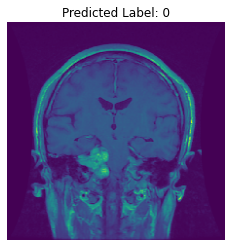

In [62]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

# Load and preprocess the image
image_path = '/Users/shyamsonu/Downloads/Brain Tumor/01 Brain Tumor/1/2300.png'  
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the trained model
predictions = model.predict(x)
predicted_label_index = np.argmax(predictions)
predicted_label = list(class_labels.keys())[predicted_label_index]

# Display the image and predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 52ms/step


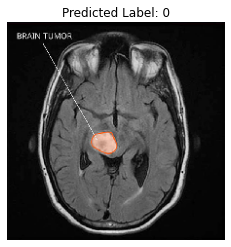

In [67]:
# Load and preprocess the image
image_path = '//Users/shyamsonu/Downloads/Glioma.jpg'  
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the trained model
predictions = model.predict(x)
predicted_label_index = np.argmax(predictions)
predicted_label = list(class_labels.keys())[predicted_label_index]

# Display the image and predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
#predicted incorrect

1/1 [==============================] - 0s 37ms/step


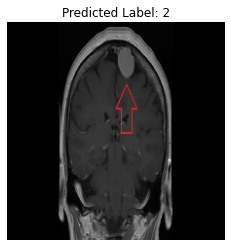

In [68]:
# Load and preprocess the image
image_path = '/Users/shyamsonu/Downloads/Meningioma.jpg'  # Replace with the path to your image
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the trained model
predictions = model.predict(x)
predicted_label_index = np.argmax(predictions)
predicted_label = list(class_labels.keys())[predicted_label_index]

# Display the image and predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
#predicted incorrect

1/1 [==============================] - 0s 42ms/step


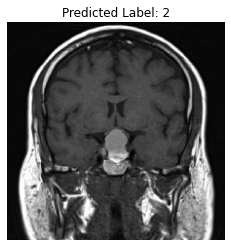

In [69]:
# Load and preprocess the image
image_path = '/Users/shyamsonu/Downloads/Pituitary.jpg'  
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the trained model
predictions = model.predict(x)
predicted_label_index = np.argmax(predictions)
predicted_label = list(class_labels.keys())[predicted_label_index]

# Display the image and predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
#predicted correct

In [1]:
# # Initialize counters for correct and incorrect predictions
# correct_predictions = 0
# incorrect_predictions = 0

# # Iterate over all predictions
# for i in range(len(filenames)):
#     true_label = list(class_labels.keys())[list(class_labels.values()).index(true_labels[i])]
#     predicted_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_labels[i])]
    
#     # Check if the prediction is correct
#     if true_label == predicted_label:
#         correct_predictions += 1
#     else:
#         incorrect_predictions += 1

# # Calculate accuracy
# accuracy = correct_predictions / (correct_predictions + incorrect_predictions)

# # Print the results
# print("Correct Predictions:", correct_predictions)
# print("Incorrect Predictions:", incorrect_predictions)
# print("Accuracy:", accuracy)